# TOPIC: Make News Real Again!

Have you ever become frustrated by your inability to tell if the content (articles, tweets, facebook posts, etc.) you are reading on the internet is actually real? With so many voices contributing to the vast quantity of content available on the internet, how do we know which sources we should trust, and which to dismiss?

Your challenge is to build a model which will make it easier and more efficient to identify what really is fake news and what is not (+ everything in between). You model should be able to determine a level of credibility, content authenticity, and limit the viral spread of fake content, including fake images.

In [1]:
import pandas as pd
import numpy as np

In [144]:
real1 = pd.read_csv('./real-news/realnews4.csv')
real2 = pd.read_csv('./real-news/realnews5.csv')
real = pd.concat([real1, real2])
real['class'] = 'real'
print('The shape of the concatenated real file is', real.shape)
real = real.drop_duplicates(subset=['text'], keep='first')
real = real.dropna(subset=['text'])
real = real.reset_index(drop=True)
print('After dropping null text and duplicate text, the shape of the concatenated real file is', real.shape)

sites = list(real['site'])
real_sites = ['cnn', 'politico', 'abcnews.go', 'google', 'bbc.com', 'economist', 'nytimes', 'pbs', 'cbs', 'nbcnews', 'bloomberg', 'npr', 'c-span', 'independent', 'apnews', 'thehill', 'fivethirtyeight', 'forbes', 'money.cnn']
ind = []
for j in range(len(sites)):
    if any(substring in sites[j] for substring in real_sites) == True:
        ind.append(j)
    else:
        pass
real = real[real.index.isin(ind)]
real = real.reset_index(drop=True)
print('After keeping rows with credible site urls, the shape of the real file is', real.shape )
real.head(2)

('The shape of the concatenated real file is', (13910, 24))
('After dropping null text and duplicate text, the shape of the concatenated real file is', (8460, 24))
('After keeping rows with credible site urls, the shape of the real file is', (2768, 24))


,author,comments,crawled,entities,external_links,highlightText,highlightTitle,language,likes,main_image,...,replies_count,shares,site,spam_score,text,thread,title,url,uuid,class
0,NaN,0.0,2017-06-22T09:17:10.016+03:00,"{u'persons': [{u'name': u'don lemon', u'sentim...",[],NaN,NaN,english,2.0,http://i2.cdn.cnn.com/cnnnext/dam/assets/17062...,...,0.0,3.0,www.cnn.com,0.0,MUST WATCH 4-year-old calms mother after Casti...,"{u'social': {u'gplus': {u'shares': 1}, u'pinte...",4-year-old calms mother after Castile shooting,http://omgili.com/ri/jHIAmI4hxg.iJPgI2z6a7QKVp...,2831a11f0c5132f3e6f49017a1d83921c8a8ccc2,real
1,NaN,0.0,2017-06-22T10:00:45.003+03:00,"{u'persons': [{u'name': u'don lemon', u'sentim...",[],NaN,NaN,english,70.0,http://i2.cdn.cnn.com/cnnnext/dam/assets/17062...,...,0.0,70.0,www.cnn.com,0.0,MUST WATCH 4-year-old calms mother after Casti...,"{u'social': {u'gplus': {u'shares': 0}, u'pinte...",4-year-old calms mother after Castile shooting,http://omgili.com/ri/jHIAmI4hxg.iJPgI2z6a7QKVp...,6c15f6666f10b4dbb24a32c534fd943c24814bbf,real


In [145]:
fake = pd.read_csv('./fake-news/fake.csv')
print('The shape of the data is', fake.shape)
fake['class'] = 'fake'
fake = fake.drop_duplicates(subset=['text'], keep='first')
fake = fake.dropna(subset=['text'])
fake = fake.reset_index(drop=True)
print('After dropping null text and duplicate text, the shape of the fake file is', fake.shape)
fake.head(2)

('The shape of the data is', (12999, 20))
('After dropping null text and duplicate text, the shape of the fake file is', (12431, 21))


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,class
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,fake
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,...,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,fake


In [146]:
real_subset = real.loc[:, ["author", "title", "published", "site", "text", "main_image", "shares", "ord_in_thread", "spam_score", "participants_count", "replies_count", "likes", "class"]]
fake_subset = fake.loc[:, ["author", "title", "published", "site_url", "text", "main_img_url", "shares", "ord_in_thread", "spam_score", "participants_count", "replies_count", "likes", "class"]]
fake_subset = fake_subset.rename(index=str, columns={"site_url": "site", "main_img_url": "main_image"})
data = pd.concat([real_subset, fake_subset])
print('The shape of the concatenated dataset is', data.shape)

('The shape of the concatenated dataset is', (15199, 13))


In [147]:
from itertools import chain
words = list(chain(data['text']))
text = []
for i in range(len(words)):
    w = words[i].decode('utf-8')
    w = w.encode('ascii', 'ignore')
    text.append(w)
data['text'] = text

In [148]:
# data.to_csv('./real_fake_data.csv', index=False)

### Create vocabulary lists 
Created a list of top 1000 and top 1000 frequency occuring words in fake and real news feed.

In [179]:
data = pd.read_csv('./real_fake_with_sentiment.csv')
data = data.dropna(subset=['text'])

In [180]:
real_text = list(data['text'][data['class'] == 'real'])
fake_text = list(data['text'][data['class'] == 'fake'])

In [181]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def get_lists(text):
    count_vect = CountVectorizer(strip_accents='unicode', decode_error = 'ignore', stop_words='english')
    X_train_counts = count_vect.fit_transform(text)
    training_feature_names = count_vect.get_feature_names()
    
    tf_transformer = TfidfTransformer()
    X_train_tfidf = tf_transformer.fit_transform(X_train_counts)
    
    pairs = dict(zip(training_feature_names, np.asarray(X_train_tfidf.mean(axis=0)).ravel()))
    sort = sorted(pairs.items(), key=lambda x: -x[1])
    sort_tup_1000 = sort[:1000]
    sort_tup_5000 = sort[:5000]
    
    list_1000 = [(i[0]).encode('ascii', 'ignore') for i in sort_tup_1000]
    list_5000 = [(i[0]).encode('ascii', 'ignore') for i in sort_tup_5000]
    return(list_1000, list_5000)

In [182]:
real_1000, real_5000 = get_lists(real_text)
fake_1000, fake_5000 = get_lists(fake_text)

### Training Naive Bayes Classifier using fake_5000 list

In [290]:
real = data[data['class'] == 'real']
fake = data[data['class'] == 'fake'].sample(n=3000, random_state=0)
data = pd.concat([real, fake])
data = data.reset_index(drop=True)
data.shape

(5768, 16)

In [291]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['class'], test_size=0.2, random_state=0)

In [292]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(strip_accents='unicode', decode_error = 'ignore', stop_words='english', vocabulary=fake_5000)
X_train_counts = count_vect.fit_transform(X_train.values)
training_feature_names = count_vect.get_feature_names()
X_train_counts.shape

(4614, 5000)

In [361]:
# from sklearn.externals import joblib
# joblib.dump(count_vect, 'vectorizer.pkl')

['vectorizer.pkl']

In [293]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer()
X_train_tfidf = tf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(4614, 5000)

In [294]:
count_vect = CountVectorizer(strip_accents='unicode', decode_error = 'ignore', stop_words='english', vocabulary=fake_5000)
X_test_counts = count_vect.fit_transform(X_test.values)
test_feature_names = count_vect.get_feature_names()
X_test_counts.shape

tf_transformer = TfidfTransformer()
X_test_tfidf = tf_transformer.fit_transform(X_test_counts)
X_test_tfidf.shape

(1154, 5000)

In [295]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0).fit(X_train_tfidf, y_train.values)
predicted = clf.predict(X_test_tfidf)

In [296]:
total = clf.class_count_.sum()
counts = list(clf.class_count_)
count = 0
length = len(counts)
for i in range(length):
    percentage = ((counts[i])/total) * 100
    print 'The percentage of instances in class %s is' %i, 'is {0:.2f}%'.format(percentage)

The percentage of instances in class 0 is is 51.91%
The percentage of instances in class 1 is is 48.09%


In [297]:
Pj = clf.feature_count_
Pj = pd.DataFrame(Pj, columns= test_feature_names, index = ['fake', 'real'])
Pj

,trump,clinton,hillary,people,said,election,2016,new,just,president,...,wallace,cruz,gallup,frame,refers,interior,alter,ranks,sentenced,fiction
fake,96.583148,88.374781,68.681694,59.583297,49.594334,51.072959,60.166027,43.944795,43.662274,39.460122,...,1.532189,0.566917,0.964343,0.850497,1.205574,1.409617,1.314755,1.180335,1.369360,1.866105
real,67.682125,5.351321,6.144028,40.532792,62.930435,13.140244,7.332797,35.165698,33.927461,38.018772,...,0.128420,4.500937,0.241973,1.094378,0.091428,0.950533,0.228981,1.471970,1.066972,0.599075


In [298]:
from sklearn import metrics
metrics.accuracy_score(y_test.values, predicted)

0.8518197573656846

In [305]:
probs = pd.DataFrame(clf.predict_proba(X_test_tfidf), columns=['prob_fake', 'prob_real'], index=X_test.index)
probs['predicted'] = predicted
probs['real'] = y_test.values
probs.head()

,prob_fake,prob_real,predicted,real
776,0.422577,0.577423,real,real
825,0.434884,0.565116,real,real
4979,0.637397,0.362603,fake,fake
3583,0.762032,0.237968,fake,fake
1095,0.415046,0.584954,real,real


In [391]:
# a = data.ix[X_train.index]
# a['data_type'] ='train'
# a['predicted'] = 'pass'
# b = data.ix[X_test.index]
# b['data_type'] = 'test'
# c = pd.concat([probs, b], axis=1)
# d = pd.concat([c, a])
# d.to_csv('./model_data_into_tableau.csv', index=False)

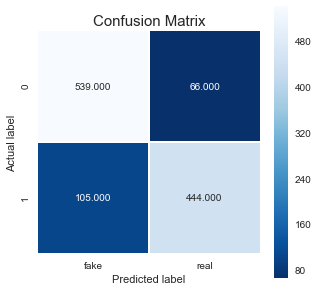

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cm = pd.DataFrame(metrics.confusion_matrix(y_test.values, predicted), columns = ['fake', 'real'])
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

In [344]:
# from sklearn.externals import joblib
# joblib.dump(clf, 'mnnb_model.pkl')

### Descriptive Stats for fake vs. real

In [339]:
data.groupby('class').describe()

Unnamed: 0        likes  ord_in_thread  participants_count  \
class                                                                       
fake  count   3000.000000  3000.000000    3000.000000         3000.000000   
      mean    9057.325333    11.981333       0.864333            1.851000   
      std     3596.649977    84.650695       6.385832            7.683476   
      min     2777.000000     0.000000       0.000000            0.000000   
      25%     5929.500000     0.000000       0.000000            1.000000   
      50%     9160.500000     0.000000       0.000000            1.000000   
      75%    12186.000000     0.000000       0.000000            1.000000   
      max    15198.000000   985.000000      99.000000          240.000000   
real  count   2768.000000  2768.000000    2768.000000         2768.000000   
      mean    1383.500000    73.742413      40.535766           24.065390   
      std      799.197097   199.252310      72.398519           36.399091   
      min        0.000000     0.000000       0.000000            0.000000   
      25%      691.750000     0.000000       0.000000            0.000000   
      50%     1383.500000     0.000000       2.000000            4.000000   
      75%     2075.250000     4.000000      39.000000           30.000000   
      max     2767.000000   995.000000     386.000000          202.000000   

                polarity  replies_count       shares   spam_score  \
class                                                               
fake  count  3000.000000    3000.000000  3000.000000  3000.000000   
      mean      0.069843       1.507667    11.981333     0.026849   
      std       0.126502      10.539844    84.650695     0.125469   
      min      -0.800000       0.000000     0.000000     0.000000   
      25%       0.005621       0.000000     0.000000     0.000000   
      50%       0.064699       0.000000     0.000000     0.000000   
      75%       0.120827       0.000000     0.000000     0.000000   
      max       1.000000     309.000000   985.000000     1.000000   
real  count  2768.000000    2768.000000  2768.000000  2768.000000   
      mean      0.069023      44.867052    80.287572     0.045472   
      std       0.192788      74.470406   214.763360     0.173535   
      min      -1.000000       0.000000     0.000000     0.000000   
      25%       0.000000       0.000000     0.000000     0.000000   
      50%       0.069056       4.000000     0.000000     0.000000   
      75%       0.150000      54.000000     6.000000     0.000000   
      max       1.000000     386.000000  2278.000000     1.000000   

             subjectivity  
class                      
fake  count   3000.000000  
      mean       0.419061  
      std        0.150870  
      min        0.000000  
      25%        0.367190  
      50%        0.433333  
      75%        0.493259  
      max        1.000000  
real  count   2768.000000  
      mean       0.419260  
      std        0.207114  
      min        0.000000  
      25%        0.337150  
      50%        0.423549  
      75%        0.507765  
      max        1.000000